In [5]:
import numpy as np
import matplotlib as plt


def LVmodel(x,y,t,a,b,c,d):
    x,y=y
    dx_dt=a*x-b*x*y
    dy_dt=-cy+d*x*y
    return np.array([dx_dt,dy_dt])

a,b,c,d=1.1, 0.4, 0.1, 0.4

x0=40
y0=9
y=np.array([x0,y0])

h=0.001
t=np.arange(0,200,0.01)


for i in range(len(t)-1):
    k1=h*LVmodel(y[i],t[i],a,b,c,d)
    k2=h*LVmodel(y[i]+0.5*k1, t[i]+0.5*h, a,b,c,d)
    k3=h*LVmodel(y[i]+0.5*k2, t[i]+0.5*h, a,b,c,d)
    k4=h*LVmodel(y[i]+k3, t[i]+h, a,b,c,d)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

plt.plot(t, y[:, 0], label='Prey')
plt.plot(t, y[:, 1], label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model using RK4 Method')
plt.grid(True)
plt.show()

TypeError: LVmodel() missing 1 required positional argument: 'd'

199999


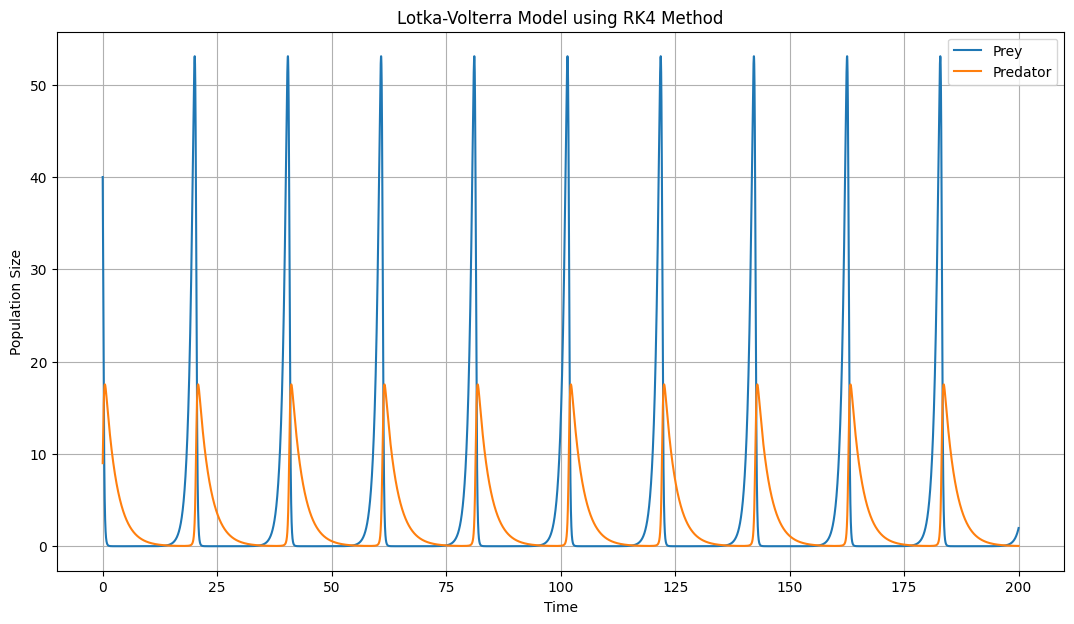

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lotka-Volterra equations
def LVmodel(z, t, a, b, c, d):
    x, y = z
    dx_dt = a*x - b*x*y
    dy_dt = c*x*y - d*y
    return np.array([dx_dt, dy_dt])

# Set the parameters and initial conditions
a, b, c, d = 1.1, 0.4, 0.1, 0.4
z0 = np.array([40, 9])
t = np.arange(0, 200, 0.001)
h=0.001

# Initialize the solution array
z = np.zeros((len(t), 2))
z[0] = z0

# Solve the system of equations using the RK4 method
for i in range(len(t) - 1):
    k1 = h * LVmodel(z[i], t[i], a, b, c, d)
    k2 = h * LVmodel(z[i] + 0.5*k1, t[i] + 0.5*h, a, b, c, d)
    k3 = h * LVmodel(z[i] + 0.5*k2, t[i] + 0.5*h, a, b, c, d)
    k4 = h * LVmodel(z[i] + k3, t[i] + h, a, b, c, d)
    z[i + 1] = z[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

print(len(t)-1)
# Plot the results
plt.figure(figsize=(13, 7))
plt.plot(t, z[:, 0], label='Prey')
plt.plot(t, z[:, 1], label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model using RK4 Method')
plt.grid(True)
plt.show()


0.009999999999990905


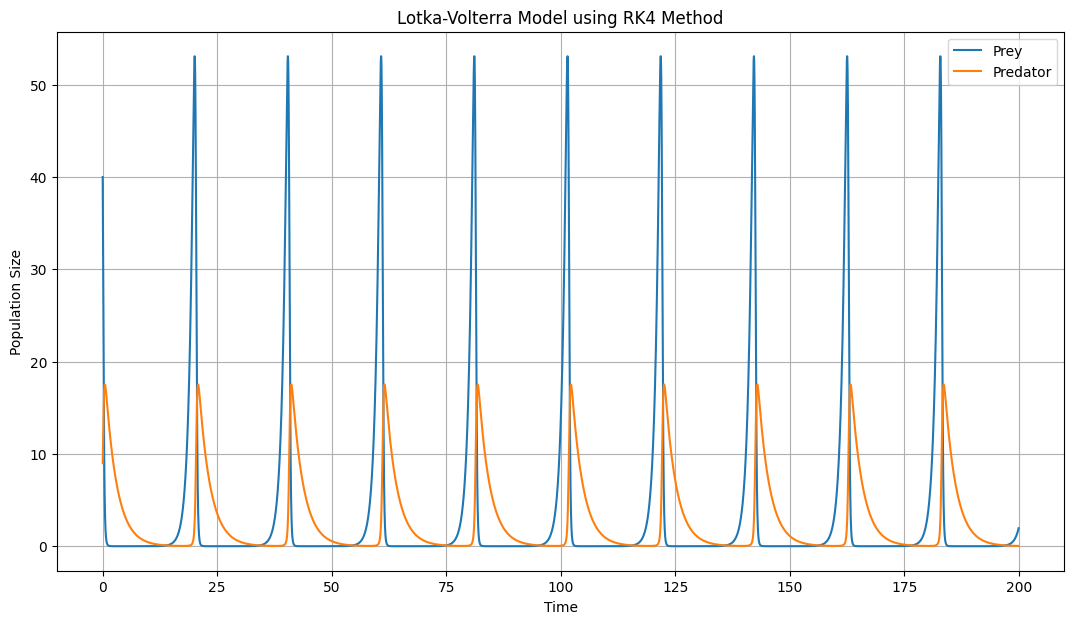

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lotka-Volterra equations
def lotka_volterra(y, t, params):
    x, z = y
    a, b, c, d = params
    return np.array([a*x - b*x*z, c*x*z - d*z])

# Set the parameters and initial conditions
params = [1.1, 0.4, 0.1, 0.4]
y0 = [40, 9]
t = np.arange(0, 200,0.01)

# Initialize the solution array
y = np.zeros((len(t), len(y0)))
y[0] = y0

# Solve the system of equations using the RK4 method
for i in range(len(t) - 1):
    h = t[i+1] - t[i]
    k1 = h * lotka_volterra(y[i], t[i], params)
    k2 = h * lotka_volterra(y[i] + 0.5*k1, t[i] + 0.5*h, params)
    k3 = h * lotka_volterra(y[i] + 0.5*k2, t[i] + 0.5*h, params)
    k4 = h * lotka_volterra(y[i] + k3, t[i] + h, params)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

print(h)
# Plot the results
plt.figure(figsize=(13, 7))
plt.plot(t, y[:, 0], label='Prey')
plt.plot(t, y[:, 1], label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model using RK4 Method')
plt.grid(True)
plt.show()


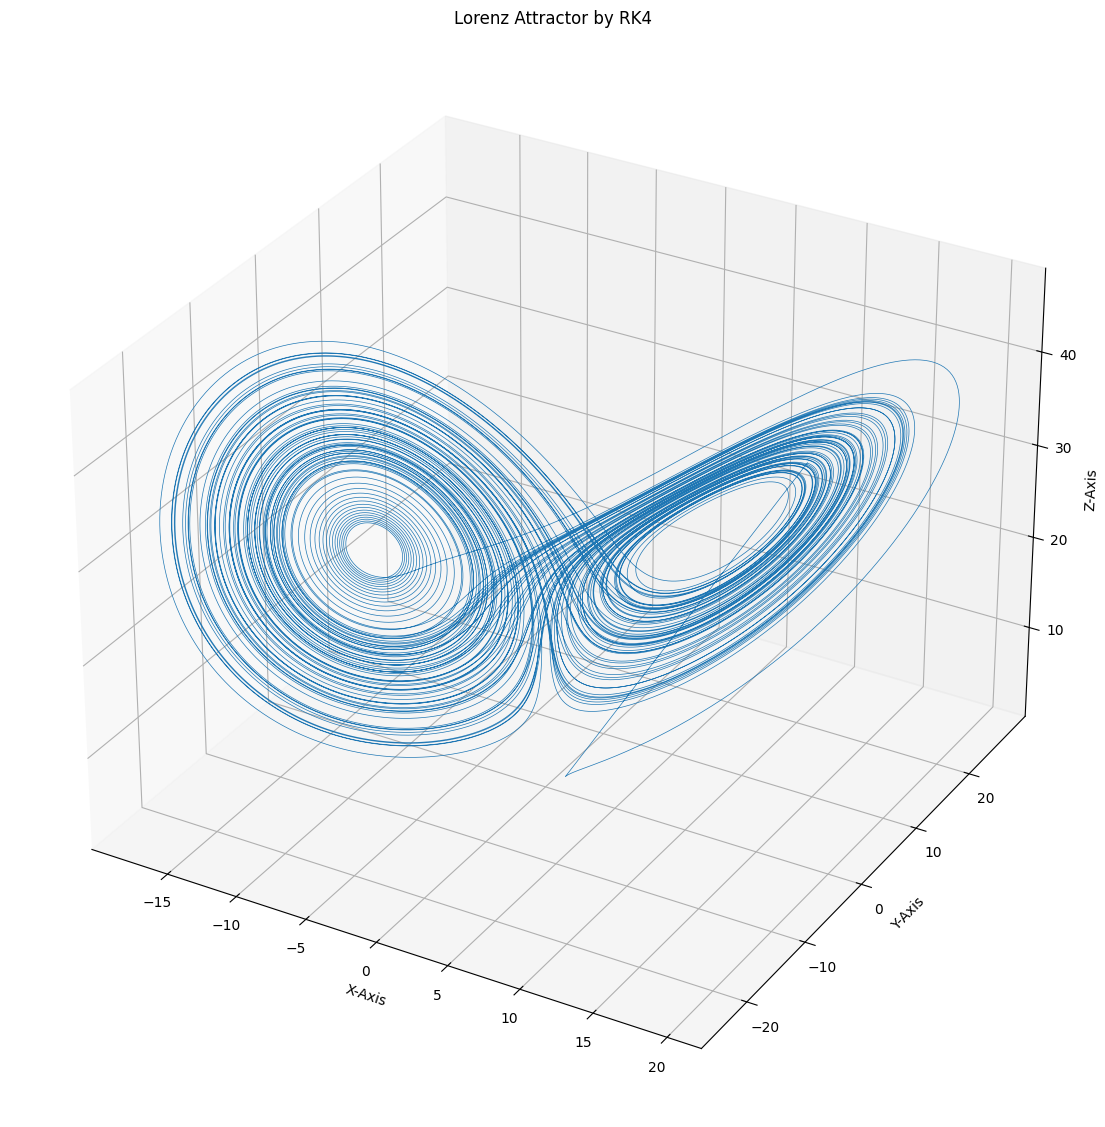

In [28]:
#Lorentz attractor

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = 1, 1, 1

def chaos(x, y, z, t,a=10, b=8/3 , c=28):
    dx_dt = a * ( y - x )
    dy_dt = x * (c - z) - y
    dz_dt = x * y - b * z
    return np.array([dx_dt, dy_dt, dz_dt])

t = np.arange(0,100,0.001)
h=0.001

xlist = []
ylist = []
zlist = []


# Solve the system of equations using the RK4 method
for i in range(len(t)):
    kx1, ky1, kz1 = h * chaos(x, y, z, t[i], a, b, c)
    kx2, ky2, kz2 = h * chaos(x + 0.5 * kx1, y + 0.5 * ky1, z + 0.5 * kz1, t[i] + 0.5 * h, a, b, c)
    kx3, ky3, kz3 = h * chaos(x + 0.5 * kx2, y + 0.5 * ky2, z + 0.5 * kz2, t[i] + 0.5 * h, a, b, c)
    kx4, ky4, kz4 = h * chaos(x + kx3, y + ky3, z + kz3, t[i] + h, a, b, c)
    x += (kx1 + 2 * (kx2 + kx3) + kx4) / 6
    y += (ky1 + 2 * (ky2 + ky3) + ky4) / 6
    z += (kz1 + 2 * (kz2 + kz3) + kz4) / 6
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)


# Convert lists to numpy arrays for plotting
xlist = np.array(xlist)
ylist = np.array(ylist)
zlist = np.array(zlist)

xlist[0],ylist[0],zlist[0] = x, y, z #initial conditions


# Create a 3D plot
fig = plt.figure(figsize=(14,17))
ax = fig.add_subplot(111, projection='3d')



ax.plot(xlist, ylist, zlist, lw=0.5)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title("Lorenz Attractor by RK4")

plt.savefig('chaos.pdf')
plt.show()



In [19]:
import pygame
import os
from matrix import *
import math
import colorsys

#--- enjoy the spaghetti code ------

os.environ["SDL_VIDEO_CENTERED"]='1'
width, height = 1920, 1080
size = (width, height)
white, black = (200, 200, 200), (0, 0, 0)
pygame.init()
pygame.display.set_caption("Lorenz Attractor")
screen = pygame.display.set_mode(size)
clock = pygame.time.Clock()
fps = 60

sigma = 10
row = 28
beta = 8/3
x, y, z = 0.01, 0, 0
points = []
colors = []
scale = 15
angle = 0
previous = None

def hsv2rgb(h,s,v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))
can_draw = False
run = True
while run:
    screen.fill(black)
    clock.tick(fps)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                run = False

    rotation_x = [[1, 0, 0],
                  [0, math.cos(angle), -math.sin(angle)],
                  [0, math.sin(angle), math.cos(angle)]]

    rotation_y = [[math.cos(angle), 0, -math.sin(angle)],
                  [0, 1, 0],
                  [math.sin(angle), 0, math.cos(angle)]]

    rotation_z =[[math.cos(angle), -math.sin(angle), 0],
                 [math.sin(angle), math.cos(angle), 0 ],
                  [0, 0, 1]]
    time = 0.009
    dx = (sigma * (y - x))*time
    dy = (x * (row - z) - y)*time
    dz = (x * y - beta * z)*time

    x = x + dx
    y = y + dy
    z = z + dz
    hue = 0

    point = [[x], [y], [z]]
    points.append(point)
    for p in range(len(points)):

        rotated_2d = matrix_multiplication(rotation_y, points[p])
        distance = 5

        val = 1/(distance - rotated_2d[2][0])#z value
        projection_matrix = [[1, 0, 0],
                             [0, 1, 0]]

        projected2d = matrix_multiplication(projection_matrix, rotated_2d)
        x_pos = int(projected2d[0][0] * scale) + width//2 + 100
        y_pos = int(projected2d[1][0] * scale) + height//2
        if hue > 1:
            hue = 0
        #pygame.draw.circle(screen, (hsv2rgb(hue, 1, 1)) , (x_pos, y_pos), 3)
        if previous is not None:
            if hue >  0.006:
                pygame.draw.line(screen, (hsv2rgb(hue, 1, 1)), (x_pos, y_pos), previous, 4 )


        previous = (x_pos, y_pos)
        hue +=0.006


    angle += 0.01

    pygame.display.update()
pygame.quit()

pygame 2.5.2 (SDL 2.28.3, Python 3.12.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


ModuleNotFoundError: No module named 'matrix'

c:\Users\Prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


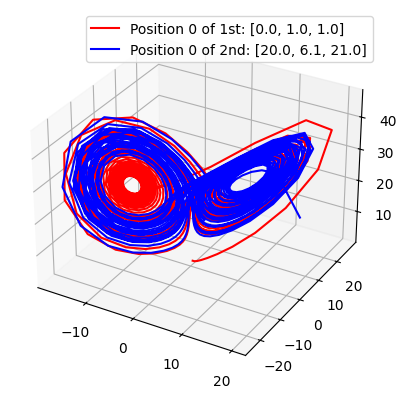

<Figure size 1300x700 with 0 Axes>

In [22]:
# -------  Importing Libraries ------- #

import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

from scipy.integrate import odeint

# -------  Defining the Constants of the system ------- #

sigma = 10
beta = 8/3
rho = 28

# -------  Solving the System Numerically ------- #

def system_of_odes(vector, t, sigma, beta, rho):
    x, y, z = vector

    d_vector = [
        sigma*(y - x),
        x*(rho - z) - y,
        x*y - beta*z
    ]
    return d_vector 


position_0_1 = [0.0, 1.0, 1.0] # Represents the 1st position at t = 0
position_0_2 = [20.0, 6.1, 21.0] # Represents the 2nd position at t = 0

time_points = np.linspace(0, 40, 1001)

# Solving for the 1st system
positions_1 = odeint(system_of_odes, position_0_1, time_points, args=(sigma, beta, rho))
x_sol_1, y_sol_1, z_sol_1 = positions_1[:, 0], positions_1[:, 1], positions_1[:, 2]

# Solving for the 2nd system
positions_2 = odeint(system_of_odes, position_0_2, time_points, args=(sigma, beta, rho))
x_sol_2, y_sol_2, z_sol_2 = positions_2[:, 0], positions_2[:, 1], positions_2[:, 2]

# -------  Plotting the solutions ------- #

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

lorenz_plt_1, = ax.plot(x_sol_1, y_sol_1, z_sol_1, 'red', label=f'Position 0 of 1st: {position_0_1}')
lorenz_plt_2, = ax.plot(x_sol_2, y_sol_2, z_sol_2, 'blue',label=f'Position 0 of 2nd: {position_0_2}')

plt.legend()

# -------  Animating the solutions ------- #

def update(frame):
    lower_lim = max(0, frame - 100)

    x_current_1 = x_sol_1[lower_lim:frame+1]
    y_current_1 = y_sol_1[lower_lim:frame+1]
    z_current_1 = z_sol_1[lower_lim:frame+1]

    x_current_2 = x_sol_2[lower_lim:frame+1]
    y_current_2 = y_sol_2[lower_lim:frame+1]
    z_current_2 = z_sol_2[lower_lim:frame+1]

    lorenz_plt_1.set_data(x_current_1, y_current_1)
    lorenz_plt_1.set_3d_properties(z_current_1)  

    lorenz_plt_2.set_data(x_current_2, y_current_2)
    lorenz_plt_2.set_3d_properties(z_current_2)  

    return lorenz_plt_1, lorenz_plt_2

animation = FuncAnimation(fig, update, frames=len(time_points), interval=25, blit=False)

plt.figure(figsize=(13, 7))
plt.show()